In [150]:
# Celem analizy jest zweryfikowanie jak wielu klientów przybywa z roku na rok
# Zwizualizowanie danych przy pomocy wykresu słupkowego
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime

In [151]:
# Wczytanie danych
customers = pd.read_csv('customers.csv', sep=";")
orders = pd.read_csv('orders.csv', sep=";", encoding="ISO-8859-1")

In [152]:
mergedOC = orders.merge(customers, on="customerid")

In [153]:
mergedOC.head(n=10)

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,householdid,gender,firstname
0,1002854,45978,2141,2009-10-13,NEWTON,MA,2459,VI,190.00,3,3,18991234,M,LOUIS
1,1002855,125381,2173,2009-10-13,NEW ROCHELLE,NY,10804,VI,10.00,1,1,36173848,M,ANTHONY
2,1002856,103122,2141,2011-06-02,MIAMI,FL,33137,AE,35.22,2,2,36204911,NaN,MERRILL
3,1002857,130980,2173,2009-10-14,E RUTHERFORD,NJ,7073,AE,10.00,1,1,36173923,F,MARIA
4,1002886,48553,2141,2010-11-19,BALTIMORE,MD,21218,VI,10.00,1,1,19227025,NaN,T.
5,1002887,106150,2173,2009-10-15,ROWAYTON,CT,6853,AE,10.00,1,1,36185316,M,CRAIG
6,1002888,27805,2173,2009-10-15,INDIANAPOLIS,IN,46240,VI,10.00,1,1,18368062,F,SUSAN
7,1002889,24546,2173,2009-10-15,PLEASANTVILLE,NY,10570,MC,10.00,1,1,19319923,M,JOE
8,1002890,43783,2173,2009-10-15,EAST STROUDSBURG,PA,18301,DB,29.68,2,2,19130968,M,ROBERT
9,1003004,15688,2173,2009-10-15,ROUND LAKE PARK,IL,60073,DB,19.68,1,1,20542726,M,BILL


In [154]:
# Ekstrakcja roku z kolumny orderDate
import datetime as dt
mergedOC['orderdate'] = pd.to_datetime(mergedOC['orderdate'])
mergedOC['year'] = mergedOC['orderdate'].dt.year


In [155]:
# Usunięcie zduplikowanych linii. Zastosowanie funkcji drop_duplicates w celu usunięcia tych linii, które reprezentują już
#istniejące householdid, które wystąpiły w poprzedzających latach.

abc = mergedOC.drop_duplicates(['year','householdid'], keep = False)

In [156]:
# Pogrupowanie zamówień według roku. Wynik przedstawia jak wiele gospodarstw zamawiało produkty w każdym roku.
# Niestety rezultaty nie odpowiadają na pytanie jak wiele gospodarstw zwiększało się z roku na rok. Pożądana liczba występuje
# tylko dla 2009 roku.
# Gspodarstwa, które zakupiły produkt w 2009, mogą dokonać zakupu również w późniejszych latach. tak więc wyniki od 2010
# zawierają skumulowaną wartość liczbową ilości gospodarstw domowych.
mergedOC=abc.groupby(['year']).size().reset_index(name='NoOfHouseholds')
mergedOC

,year,NoOfHouseholds
0,2009,6582
1,2010,16022
2,2011,22473
3,2012,17401
4,2013,24581
5,2014,36855
6,2015,25201
7,2016,13343


Text(0.5,0,'Date time')

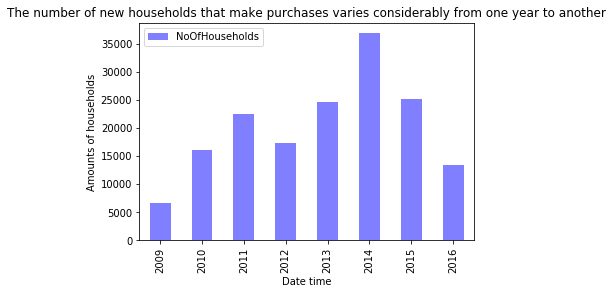

In [157]:
mergedOC.plot.bar('year','NoOfHouseholds', alpha=.5, color='blue')

# Ustawienie nazw osi oraz tytułu:
plt.title("The number of new households that make purchases varies considerably from one year to another")
plt.ylabel('Amounts of households')
plt.xlabel('Date time')
